# Inicialization

In [89]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import scipy.stats as stats

# Loading the dataset

In [90]:
# Loading the data
df = pd.read_csv('logs_exp_us.csv', sep='\t')

# Preparing the data

In [91]:
# Renaming columns
df.columns = ['event_name', 'user_id', 'event_hour', 'exp_id']

In [92]:
# Converting values to seconds
df['event_hour'] = pd.to_datetime(df['event_hour'], unit='s')

In [93]:
# Creating the date column
df['session_date'] = df['event_hour'].dt.date

In [94]:
# Changing the data type
df['session_date'] = pd.to_datetime(df['session_date'])

In [95]:
# Viewing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   event_name    244126 non-null  object        
 1   user_id       244126 non-null  int64         
 2   event_hour    244126 non-null  datetime64[ns]
 3   exp_id        244126 non-null  int64         
 4   session_date  244126 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 9.3+ MB


In [96]:
# Displaying the data
df.head()

,event_name,user_id,event_hour,exp_id,session_date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


In [97]:
# Checking for duplicate values
df.duplicated().sum()

413

In [98]:
df[df.duplicated()]

,event_name,user_id,event_hour,exp_id,session_date
453,MainScreenAppear,5613408041324010552,2019-07-30 08:19:44,248,2019-07-30
2350,CartScreenAppear,1694940645335807244,2019-07-31 21:51:39,248,2019-07-31
3573,MainScreenAppear,434103746454591587,2019-08-01 02:59:37,248,2019-08-01
4076,MainScreenAppear,3761373764179762633,2019-08-01 03:47:46,247,2019-08-01
4803,MainScreenAppear,2835328739789306622,2019-08-01 04:44:01,248,2019-08-01
...,...,...,...,...,...
242329,MainScreenAppear,8870358373313968633,2019-08-07 19:26:44,247,2019-08-07
242332,PaymentScreenSuccessful,4718002964983105693,2019-08-07 19:26:45,247,2019-08-07
242360,PaymentScreenSuccessful,2382591782303281935,2019-08-07 19:27:29,246,2019-08-07
242362,CartScreenAppear,2382591782303281935,2019-08-07 19:27:29,246,2019-08-07


In [99]:
# Removing duplicate values
df = df.drop_duplicates(subset=['event_name', 'user_id', 'event_hour', 'exp_id', 'session_date'])

# Studying and Verifying the Data

In [100]:
# How many events are in the records?

# Getting the total number of events
total_events_count = df.nunique()
total_events_count

event_name           5
user_id           7551
event_hour      176654
exp_id               3
session_date        14
dtype: int64

In [101]:
# Getting the count for each event
event_count = df['event_name'].value_counts()
event_count

event_name
MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: count, dtype: int64

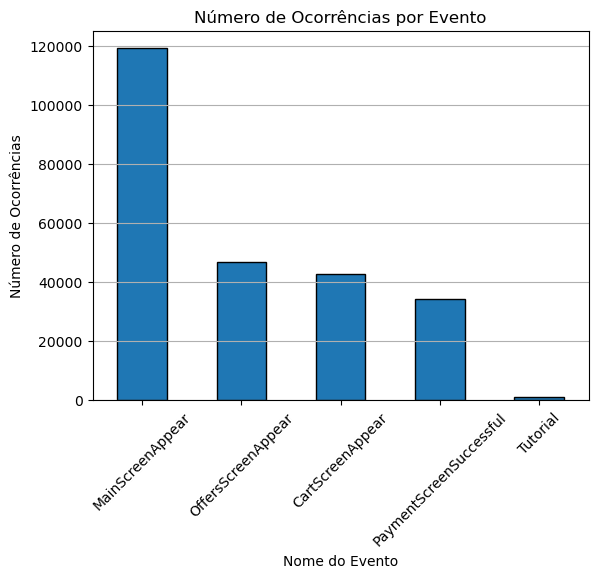

In [102]:
# Plotting a graph to observe the number of occurrences per event
event_count.plot(kind='bar', edgecolor='k')
plt.xlabel('Nome do Evento')
plt.ylabel('Número de Ocorrências')
plt.title('Número de Ocorrências por Evento')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

Note: The most frequent event is user activity in the main menu of the app, while the least frequent event is the tutorial. This could be because the tutorial isn't mandatory, leading users to potentially skip this step (Hypothesis)

In [103]:
# How many users are in the records?

# Getting the count of unique users in the records
user_count = df['user_id'].nunique()
print(f"The number of unique users is {user_count}.")

The number of unique users is 7551.


In [104]:
# What is the average number of events per user?

total_events = df['event_name'].count()
total_events
# Getting the average number of events per user
avg_user_per_event = total_events / user_count
avg_user_per_event
print(f"The average number of events per user is {avg_user_per_event:.2f}%")

The average number of events per user is 32.28%


In [105]:
# What is the time period covered by the data?

# Getting the start date of the data
df_session_min = df['session_date'].min()
print(f"The minimum date is: {df_session_min}.")

The minimum date is: 2019-07-25 00:00:00.


In [106]:
# Obtaining the last record date
df_session_max = df['session_date'].max()
print(f"The maximum date is: {df_session_max}.")

The maximum date is: 2019-08-07 00:00:00.


k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



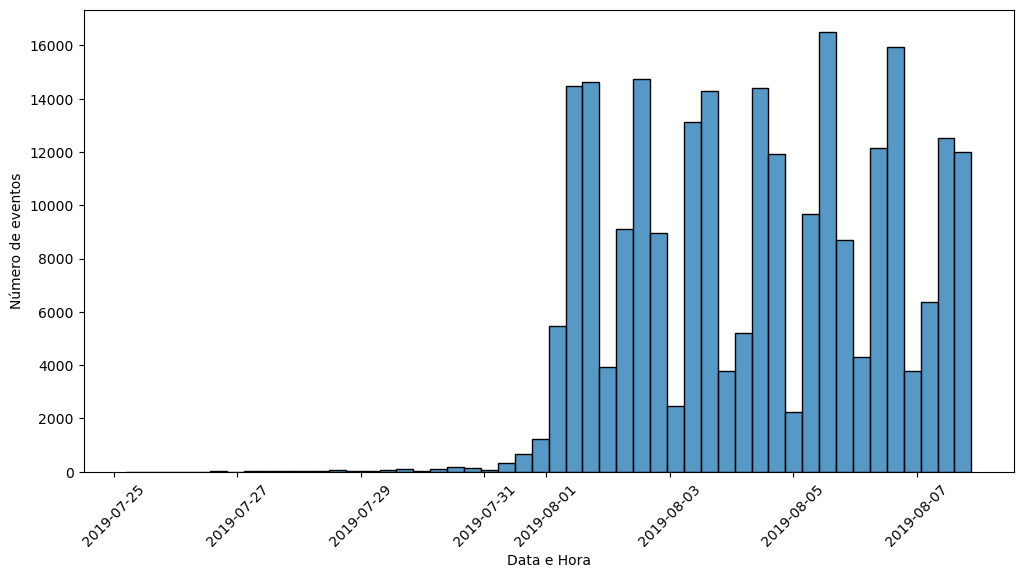

In [107]:
# Drawing a histogram by date and time. Can you be sure that you have equally complete data for the entire period?

# Creating histogram by date and time
plt.figure(figsize=(12, 6))
sns.histplot(df['event_hour'], bins=50, kde=False)
plt.xlabel('Data e Hora')
plt.ylabel('Número de eventos')
plt.xticks(rotation=45)
plt.show()          

Note: We do not have complete data for the entire period, so I will separate the data by the date where it becomes more complete.

# Qual período os dados realmente representam?

Note: We will take the data starting from August, as it is when the data becomes more complete.

# Você perdeu muitos eventos e usuários ao excluir os dados mais antigos?

In [108]:
# Filtering the data by the chosen month
df_filtered = df.loc[df['event_hour'].dt.month >= 8]

In [109]:
# Values before filtering the data
event_count.reset_index()

,event_name,count
0,MainScreenAppear,119101
1,OffersScreenAppear,46808
2,CartScreenAppear,42668
3,PaymentScreenSuccessful,34118
4,Tutorial,1018


In [110]:
# Values after filtering
event_count_filtered = df_filtered['event_name'].value_counts()
event_count_filtered.reset_index()

,event_name,count
0,MainScreenAppear,117328
1,OffersScreenAppear,46333
2,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


In [111]:
df_comparsion = event_count - event_count_filtered
print(df_comparsion)
print(f"Above we have the number of users lost after filtering the data.")

event_name
MainScreenAppear           1773
OffersScreenAppear          475
CartScreenAppear            365
PaymentScreenSuccessful     200
Tutorial                     13
Name: count, dtype: int64
Above we have the number of users lost after filtering the data.


In [112]:
df_comparsion_percent = df_comparsion / event_count * 100
print(df_comparsion_percent)
print(f"Above we have the percentage of users lost after filtering the data.")

event_name
MainScreenAppear           1.488652
OffersScreenAppear         1.014784
CartScreenAppear           0.855442
PaymentScreenSuccessful    0.586201
Tutorial                   1.277014
Name: count, dtype: float64
Above we have the percentage of users lost after filtering the data.


Note:  After filtering the data starting from August, where we found more complete records, we observed the loss of some events and users. However, these exclusions are minimal. I believe they will not have a significant impact on the research.

### Make sure to have users from all three experimental groups.

In [113]:
# Values before data filtering
df_exp_count = df['exp_id'].value_counts()
df_exp_count

exp_id
248    85582
246    80181
247    77950
Name: count, dtype: int64

In [114]:
# Values after data filtering
df_exp_filtered = df_filtered['exp_id'].value_counts()
df_exp_filtered

exp_id
248    84563
246    79302
247    77022
Name: count, dtype: int64

Note: Even after filtering the data, we still have users from all three experimental groups.

k:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



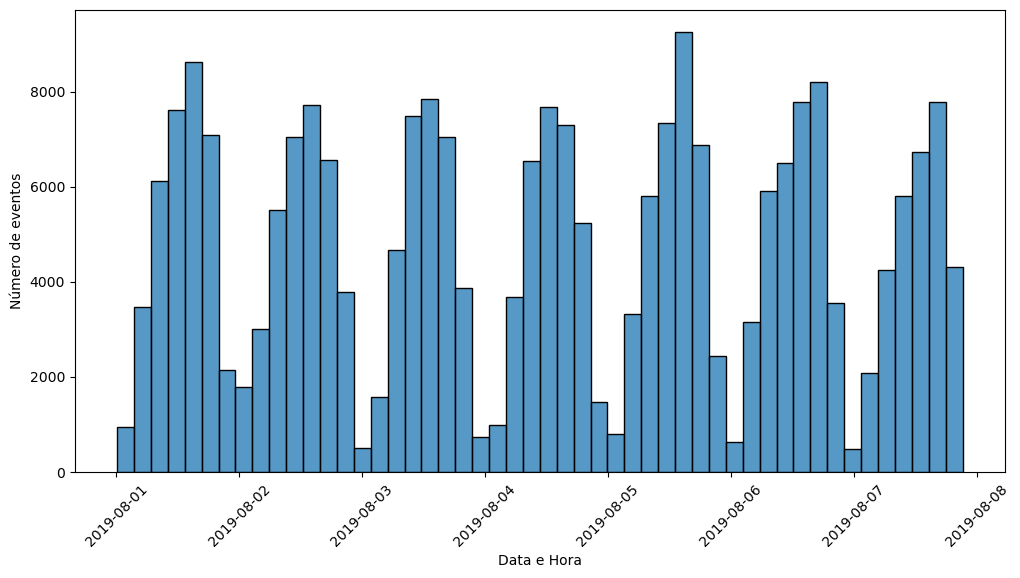

In [115]:
# Histogram of the filtered data by date and time
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered['event_hour'], bins=50, kde=False)
plt.xlabel('Data e Hora')
plt.ylabel('Número de eventos')
plt.xticks(rotation=45)
plt.show()          

Note: We can clearly see that the data starting from the date 2019-08-01 is more complete than the previous records.

# Study of event endings

See which events are in the logs and their frequency of occurrence. Sort them by frequency.

In [116]:
# Displaying the event frequency
event_count_filtered = df_filtered['event_name'].value_counts().reset_index()
event_count_filtered.columns = ['event_name', 'frequency']
event_count_filtered = event_count_filtered.sort_values(by='frequency', ascending=False).reset_index(drop=True)
event_count_filtered

,event_name,frequency
0,MainScreenAppear,117328
1,OffersScreenAppear,46333
2,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


## Find the number of users who performed each of these actions. Sort the events by the number of users. Calculate the proportion of users who performed the action at least once.

In [117]:
user_counts = df_filtered.groupby('event_name')['user_id'].nunique().reset_index() # Grouping the data
user_counts.columns = ['event_name', 'numb_user'] # Renaming the columns
user_counts = user_counts.sort_values(by='numb_user', ascending=False).reset_index(drop=True)
#user_counts_per_events
total_user = df_filtered['user_id'].nunique() # Calculating the total number of unique users
user_counts['proportion'] = user_counts['numb_user'] / total_user
user_counts['proportion']

0    0.984736
1    0.609636
2    0.495620
3    0.469737
4    0.111495
Name: proportion, dtype: float64

## What order do you think the actions occurred in? Do they all belong to a single sequence? You don't need to consider them when calculating the funnel.

Note: The event MainScreenAppear is the most frequent, indicating that most users view the main screen.

Next, the event OffersScreenAppear is the second most frequent, suggesting that many users who view the main screen also access the offers screen.

The CartScreenAppear event occurs less frequently than MainScreenAppear and OffersScreenAppear, but it is still significant.

Only a fraction of users who reach the cart screen successfully complete the payment in the PaymentScreenSuccessful event.

Lastly, the Tutorial event is the least frequent, being accessed by a minority of users.

Not all events are part of the same sequence; a small percentage of users start with the tutorial, even though it is not mandatory.

## Use the event funnel to find the proportion of users who move from one stage to the next (for example, for the event sequence A → B → C, calculate the proportion of users at stage B to the number of users at stage A, and the proportion of users at stage C to the number at stage B).

In [118]:
# Counting and renaming columns by events
event_counts = df_filtered['event_name'].value_counts().reset_index()
event_counts.columns = ['event_name', 'count'] # Renaming the columns

# Calculating the percentage each event represents of the total events
total_events = event_counts['count'].sum()
event_counts['percentage'] = (event_counts['count'] / total_events) * 100

# Calculating the absolute number of users at each stage of the funnel
user_counts = df_filtered.groupby('event_name')['user_id'].nunique().reset_index()
user_counts.columns = ['event_name', 'num_users']

# Creating the funnel chart with the absolute number of users
fig = go.Figure(go.Funnel(
    y = event_counts['event_name'],
    x = event_counts['percentage'],
    textinfo = "value+percent initial",
    connector = {"line": {"color": "royalblue", "dash": "dot"}},
    name = "Event Funnel"
))

fig.update_layout(
    title = "Event Funnel",
    yaxis_title = "Events",
    xaxis_title = "Percentage (%)"
)

# Adding the absolute number of users at each stage
for i in range(len(event_counts)):
    event = event_counts.loc[i, 'event_name']
    num_users = user_counts[user_counts['event_name'] == event]['num_users'].values[0]
    fig.add_annotation(
        x = 100, y = i,
        text = f"{num_users} users",
        showarrow = False,
        font = dict(size=12, color="black"),
        align = "left"
    )

fig.show()


Note:

After creating the funnel, we can better identify the percentage of users who passed through each stage.

Only 14.1% of users completed the entire process through to payment.

We can also see a significant drop-off in users at the offers screen stage.

80.2% of users who reached the cart stage completed their orders.

## Em qual fase você perde mais usuários?

Note: We observed a higher drop-off of users on the payment screen, indicating that not everyone is completing their orders.

In [119]:
event_counts

,event_name,count,percentage
0,MainScreenAppear,117328,48.706655
1,OffersScreenAppear,46333,19.234330
2,CartScreenAppear,42303,17.561346
3,PaymentScreenSuccessful,33918,14.080461
4,Tutorial,1005,0.417208


## What percentage of users follow the entire path from the first event to payment?

Note: Only 14.1% of users go through the entire path to payment.

## How many users are in each group?

In [120]:
# Filter for user group [246]
filter_246 = df_filtered[df_filtered['exp_id'] == 246]
users_246 = filter_246['user_id'].nunique()

# Filter for user group [247]
filter_247 = df_filtered[df_filtered['exp_id'] == 247]
users_247 = filter_247['user_id'].nunique()

# Filter for user group [248]
filter_248 = df_filtered[df_filtered['exp_id'] == 248]
users_248 = filter_248['user_id'].nunique()

# Exibir os resultados
print(f"Users in group 246: {users_246}")
print(f"Users in group 247: {users_247}")
print(f"Users in group 248: {users_248}")

Users in group 246: 2484
Users in group 247: 2513
Users in group 248: 2537


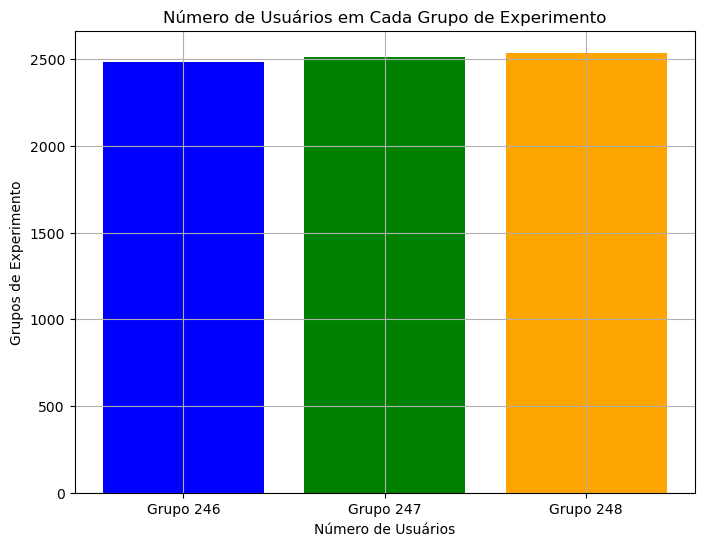

In [121]:
# Counting users in each group
users = [users_246, users_247, users_248]
group = ['Grupo 246', 'Grupo 247', 'Grupo 248']

# Creating a horizontal bar chart
plt.figure(figsize=(8, 6))
plt.bar(group, users, color=['blue', 'green', 'orange'])
plt.xlabel('Número de Usuários')
plt.ylabel('Grupos de Experimento')
plt.title('Número de Usuários em Cada Grupo de Experimento')
plt.grid(True)
plt.show()

## Filter to count users in the control groups (246, 247) and test group (248)

In [122]:
# Filter for group A/A
group_A_A = users_246 + users_247
# Filter for group B
group_B = users_248

print(f"In group A/A (control) there are: {group_A_A} usuários")
print(f"In group B (test) there are: {group_B} usuários")

In group A/A (control) there are: 4997 usuários
In group B (test) there are: 2537 usuários


## We have two control groups in the A/A test, where we verify our mechanisms and calculations. Check if there is a statistically significant difference between samples 246 and 247.

In [123]:
# Counting the number of events per user in each group
events_per_user_246 = filter_246.groupby('user_id').size()
events_per_user_247 = filter_247.groupby('user_id').size()

# Performing Student's t-test for two samples
t_stat, p_value = stats.ttest_ind(events_per_user_246, events_per_user_247, equal_var=False)

# Display the result
print(f"t-test result: t-statistic = {t_stat}, p-value = {p_value}")

# Alpha value
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference between the groups")
else:
    print("There is no statistically significant difference between the groups")

t-test result: t-statistic = 0.7415177814595091, p-value = 0.4584152588842866
There is no statistically significant difference between the groups


Note: There is no statistically significant difference between groups 246 and 247.

## Select the most popular event. In each control group, find the number of users who performed this action. Find their proportion. Check if the difference between the groups is statistically significant. Repeat the procedure for all other events (it will save time if you create a special function for this test). Can you confirm if the groups were split correctly?

In [124]:
# Function to perform the proportion test between the most popular events of two groups

def teste_proporcao_eventos_populares(df, grupo1, grupo2):
    #  Filtering data for each group
    df_grupo1 = df[df['exp_id'] == grupo1]
    df_grupo2 = df[df['exp_id'] == grupo2]
    
    # Finding the most popular event in each group
    eventos_populares_grupo1 = df_grupo1['event_name'].value_counts().idxmax()
    eventos_populares_grupo2 = df_grupo2['event_name'].value_counts().idxmax()
    
    # Calculating how many users performed the most popular event in each group
    usuarios_evento_grupo1 = df_grupo1[df_grupo1['event_name'] == eventos_populares_grupo1]['user_id'].nunique()
    usuarios_evento_grupo2 = df_grupo2[df_grupo2['event_name'] == eventos_populares_grupo2]['user_id'].nunique()
    
    # Calculating the total number of users in each group
    total_usuarios_grupo1 = df_grupo1['user_id'].nunique()
    total_usuarios_grupo2 = df_grupo2['user_id'].nunique()
    
    # Calculating the proportion of users who performed the most popular event relative to the total number of users in each group
    proporcao_grupo1 = usuarios_evento_grupo1 / total_usuarios_grupo1
    proporcao_grupo2 = usuarios_evento_grupo2 / total_usuarios_grupo2
    
    # Performing the proportion test (Z-score) to check for statistical significance between the groupss
    # Defining the variables
    
    n1 = total_usuarios_grupo1
    n2 = total_usuarios_grupo2
    p1 = proporcao_grupo1
    p2 = proporcao_grupo2
    
    # Calculating the pooled proportion and Z-score
    p_pool = (usuarios_evento_grupo1 + usuarios_evento_grupo2) / (n1 + n2) 
    z_score = (p1 - p2) / ((p_pool * (1 - p_pool) * (1 / n1 + 1 / n2)) ** 0.5)
    
    # Calculating the p-value for the two-tailed test
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
    
   
    print(f"Most popular event in the group {grupo1}: {eventos_populares_grupo1}")
    print(f"Proportion of users who performed the event in the group {grupo1}: {proporcao_grupo1:.4f}%")
    print(f"Most popular event in the group {grupo2}: {eventos_populares_grupo2}")
    print(f"Proportion of users who performed the event in the group {grupo2}: {proporcao_grupo2:.4f}%")
    print(f"Proportion test (Z-score): Z = {z_score:.4f}, Valor p = {p_value:.4f}")
    
  
    if p_value < 0.05:
        print("Statistically significant difference between the groups.")
    else:
        print("There is no statistically significant difference between the groups")

#  Performing the test for the control groups 246 and 247.
teste_proporcao_eventos_populares(df_filtered, 246, 247)


Most popular event in the group 246: MainScreenAppear
Proportion of users who performed the event in the group 246: 0.9863%
Most popular event in the group 247: MainScreenAppear
Proportion of users who performed the event in the group 247: 0.9853%
Proportion test (Z-score): Z = 0.3093, Valor p = 0.7571
There is no statistically significant difference between the groups


## Do the same for the group with altered sources. Compare the results with each of the control groups for each event individually. Compare the results with the combined results of the control groups. What conclusions can you draw from the experiment?

In [125]:
def teste_proporcao_evento(df, grupo_controle1, grupo_controle2, grupo_teste):
    # Finding the most popular event in each group
    eventos_populares_grupo1 = df[df['exp_id'] == grupo_controle1]['event_name'].value_counts().idxmax()
    eventos_populares_grupo2 = df[df['exp_id'] == grupo_controle2]['event_name'].value_counts().idxmax()
    eventos_populares_grupo_teste = df[df['exp_id'] == grupo_teste]['event_name'].value_counts().idxmax()
    
    # Calculating the number of users who performed the most popular event in each group
    usuarios_grupo1 = df[(df['exp_id'] == grupo_controle1) & (df['event_name'] == eventos_populares_grupo1)]['user_id'].nunique()
    usuarios_grupo2 = df[(df['exp_id'] == grupo_controle2) & (df['event_name'] == eventos_populares_grupo2)]['user_id'].nunique()
    usuarios_grupo_teste = df[(df['exp_id'] == grupo_teste) & (df['event_name'] == eventos_populares_grupo_teste)]['user_id'].nunique()
    
    # Calculating the total number of users in each group
    total_usuarios_grupo1 = df[df['exp_id'] == grupo_controle1]['user_id'].nunique()
    total_usuarios_grupo2 = df[df['exp_id'] == grupo_controle2]['user_id'].nunique()
    total_usuarios_grupo_teste = df[df['exp_id'] == grupo_teste]['user_id'].nunique()
    
    # Calculating the proportion of users who performed the most popular event relative to the total number of users in each group
    proporcao_grupo1 = usuarios_grupo1 / total_usuarios_grupo1
    proporcao_grupo2 = usuarios_grupo2 / total_usuarios_grupo2
    proporcao_grupo_teste = usuarios_grupo_teste / total_usuarios_grupo_teste
    
    # Performing the proportion test (Z-test)
    n1 = total_usuarios_grupo1
    n2 = total_usuarios_grupo2
    n_teste = total_usuarios_grupo_teste
    p1 = proporcao_grupo1
    p2 = proporcao_grupo2
    p_teste = proporcao_grupo_teste
    
    p_pool_controle = (usuarios_grupo1 + usuarios_grupo2) / (n1 + n2)
    z_score_controle = (p1 - p2) / ((p_pool_controle * (1 - p_pool_controle) * (1 / n1 + 1 / n2)) ** 0.5)
    p_value_controle = 2 * (1 - stats.norm.cdf(abs(z_score_controle)))  # Two-tailed test
    
    p_pool_teste = (usuarios_grupo1 + usuarios_grupo2 + usuarios_grupo_teste) / (n1 + n2 + n_teste)
    z_score_teste_controle = (p_teste - p_pool_controle) / ((p_pool_teste * (1 - p_pool_teste) * (1 / n_teste + 1 / (n1 + n2))) ** 0.5)
    p_value_teste_controle = 2 * (1 - stats.norm.cdf(abs(z_score_teste_controle)))  # Two-tailed test
    
    # Displaying results
    print(f"Most popular event in the group {grupo_controle1}: {eventos_populares_grupo1}")
    print(f"Proportion of users who performed the event in the group {grupo_controle1}: {proporcao_grupo1:.4f}%")
    print(f"Most popular event in the group {grupo_controle2}: {eventos_populares_grupo2}")
    print(f"Proportion of users who performed the event in the group {grupo_controle2}: {proporcao_grupo2:.4f}%")
    print(f"Most popular event in the group {grupo_teste}: {eventos_populares_grupo_teste}")
    print(f"Proportion of users who performed the event in the group {grupo_teste}: {proporcao_grupo_teste:.4f}%")
    print(f"Proportion test (Z-score) between test group and combined control group: Z = {z_score_teste_controle:.4f}, Valor p = {p_value_teste_controle:.4f}")
    print(f"Proportion test (Z-score) between control group 1 and control group 2: Z = {z_score_controle:.4f}, Valor p = {p_value_controle:.4f}")
    
    # Interpret the results
    alpha = 0.05
    if p_value_teste_controle < alpha:
        print("Statistically significant difference between the test group and the combined control group.")
    else:
        print("There is no statistically significant difference between the test group and the combined control group.")
    
    if p_value_controle < alpha:
        print("Statistically significant difference between control group 1 and control group 2. ")
    else:
        print("There is no statistically significant difference between control group 1 and control group 2.")

# Performing the test for control groups 246 and 247 and the test group 248.
teste_proporcao_evento(df_filtered, 246, 247, 248)

Most popular event in the group 246: MainScreenAppear
Proportion of users who performed the event in the group 246: 0.9863%
Most popular event in the group 247: MainScreenAppear
Proportion of users who performed the event in the group 247: 0.9853%
Most popular event in the group 248: MainScreenAppear
Proportion of users who performed the event in the group 248: 0.9827%
Proportion test (Z-score) between test group and combined control group: Z = -1.0489, Valor p = 0.2942
Proportion test (Z-score) between control group 1 and control group 2: Z = 0.3093, Valor p = 0.7571
There is no statistically significant difference between the test group and the combined control group.
There is no statistically significant difference between control group 1 and control group 2.


## What significance level did you define to test the statistical hypotheses mentioned above? Calculate how many statistical hypothesis tests you performed. With a statistical significance level of 0.1, one out of every 10 results could be false. What should the significance level be? If you want to change it, run the previous steps again and check your conclusions.

Note: For the above tests, I had set the alpha value at 0.05.

In [126]:
def teste_proporcao_evento(df, grupo_controle1, grupo_controle2, grupo_teste, alpha=0.01):
    # Finding the most popular event in each group
    eventos_populares_grupo1 = df[df['exp_id'] == grupo_controle1]['event_name'].value_counts().idxmax()
    eventos_populares_grupo2 = df[df['exp_id'] == grupo_controle2]['event_name'].value_counts().idxmax()
    eventos_populares_grupo_teste = df[df['exp_id'] == grupo_teste]['event_name'].value_counts().idxmax()
    
    # Calculating the number of users who performed the most popular event in each group
    usuarios_grupo1 = df[(df['exp_id'] == grupo_controle1) & (df['event_name'] == eventos_populares_grupo1)]['user_id'].nunique()
    usuarios_grupo2 = df[(df['exp_id'] == grupo_controle2) & (df['event_name'] == eventos_populares_grupo2)]['user_id'].nunique()
    usuarios_grupo_teste = df[(df['exp_id'] == grupo_teste) & (df['event_name'] == eventos_populares_grupo_teste)]['user_id'].nunique()
    
    # Calculating the total number of users in each group
    total_usuarios_grupo1 = df[df['exp_id'] == grupo_controle1]['user_id'].nunique()
    total_usuarios_grupo2 = df[df['exp_id'] == grupo_controle2]['user_id'].nunique()
    total_usuarios_grupo_teste = df[df['exp_id'] == grupo_teste]['user_id'].nunique()
    
    # Calculating the proportion of users who performed the most popular event relative to the total number of users in each group
    proporcao_grupo1 = usuarios_grupo1 / total_usuarios_grupo1
    proporcao_grupo2 = usuarios_grupo2 / total_usuarios_grupo2
    proporcao_grupo_teste = usuarios_grupo_teste / total_usuarios_grupo_teste
    
    # Perform the proportion test (Z-test
    n1 = total_usuarios_grupo1
    n2 = total_usuarios_grupo2
    n_teste = total_usuarios_grupo_teste
    p1 = proporcao_grupo1
    p2 = proporcao_grupo2
    p_teste = proporcao_grupo_teste
    
    p_pool_controle = (usuarios_grupo1 + usuarios_grupo2) / (n1 + n2)
    z_score_controle = (p1 - p2) / ((p_pool_controle * (1 - p_pool_controle) * (1 / n1 + 1 / n2)) ** 0.5)
    p_value_controle = 2 * (1 - stats.norm.cdf(abs(z_score_controle)))  # Two-tailed test
    
    p_pool_teste = (usuarios_grupo1 + usuarios_grupo2 + usuarios_grupo_teste) / (n1 + n2 + n_teste)
    z_score_teste_controle = (p_teste - p_pool_controle) / ((p_pool_teste * (1 - p_pool_teste) * (1 / n_teste + 1 / (n1 + n2))) ** 0.5)
    p_value_teste_controle = 2 * (1 - stats.norm.cdf(abs(z_score_teste_controle)))  # Two-tailed test
    
    # Interpret the results
    print(f"Most popular event in the group {grupo_controle1}: {eventos_populares_grupo1}")
    print(f"Proportion of users who performed the event in the group {grupo_controle1}: {proporcao_grupo1:.4f}%")
    print(f"Most popular event in the group {grupo_controle2}: {eventos_populares_grupo2}")
    print(f"Proportion of users who performed the event in the group {grupo_controle2}: {proporcao_grupo2:.4f}%")
    print(f"Most popular event in the group{grupo_teste}: {eventos_populares_grupo_teste}")
    print(f"Proportion of users who performed the event in the group {grupo_teste}: {proporcao_grupo_teste:.4f}%")
    print(f"Proportion test (Z-score) between the test group and the combined control group: Z = {z_score_teste_controle:.4f}, Valor p = {p_value_teste_controle:.4f}")
    print(f"Proportion test (Z-score) between control group 1 and control group 2: Z = {z_score_controle:.4f}, Valor p = {p_value_controle:.4f}")
    print(f"P-value of the proportion test for the control group:{p_value_controle:.4f}%")
    print(f"P-value of the proportion test between the test group and the combined control group:{p_value_teste_controle:.4f}%")
   # Alpha = 0.01
    if p_value_teste_controle < alpha:
        print(f"Statistically significant difference between the test group and the combined control group (alpha = {alpha}).")
    else:
        print(f"No statistically significant difference between the test group and the combined control group (alpha = {alpha}).")
    
    if p_value_controle < alpha:
        print(f"Statistically significant difference between control group 1 and control group 2 (alpha = {alpha}).")
    else:
        print(f"No statistically significant difference between control group 1 and control group 2 (alpha = {alpha}).")

# Performing the test for control groups 246 and 247 and the test group 248, with alpha = 0.01
teste_proporcao_evento(df_filtered, 246, 247, 248, alpha=0.01)


Most popular event in the group 246: MainScreenAppear
Proportion of users who performed the event in the group 246: 0.9863%
Most popular event in the group 247: MainScreenAppear
Proportion of users who performed the event in the group 247: 0.9853%
Most popular event in the group248: MainScreenAppear
Proportion of users who performed the event in the group 248: 0.9827%
Proportion test (Z-score) between the test group and the combined control group: Z = -1.0489, Valor p = 0.2942
Proportion test (Z-score) between control group 1 and control group 2: Z = 0.3093, Valor p = 0.7571
P-value of the proportion test for the control group:0.7571%
P-value of the proportion test between the test group and the combined control group:0.2942%
No statistically significant difference between the test group and the combined control group (alpha = 0.01).
No statistically significant difference between control group 1 and control group 2 (alpha = 0.01).


Note: 


I made changes to all the alpha values to check for statistical differences between the groups, but no statistical difference was found, even with the alpha value changed to 0.1.

Four hypothesis tests were conducted, one with a t-test and the other three with z-tests.

Despite changing the alpha values in all the hypothesis tests, the results remained the same, where no statistical difference was found between the groups.

## Conclusion

After filtering the data from August, I identified more complete records compared to previous months. During this analysis, I verified the presence of users in all three research groups: A/A (control) and B (test). Although I observed a slight drop in the number of users from July to August, particularly in the first step at the main screen, this loss was about 200 users and was not significant.

After a more detailed investigation of the data, I applied a funnel to understand user behavior throughout the process. I discovered that only 14.1% of users completed all the steps up to the payment. Additionally, I identified that many users may be facing difficulties or not feeling attracted to the offers screen, suggesting the need for improvements in this process.

When conducting hypothesis tests, I concluded that there is no evidence that the test group (248) behaves significantly differently compared to the combined control groups, specifically regarding the most popular event, "MainScreenAppear." This indicates that the intervention or change tested in the test group did not have a differentiated impact compared to the other groups.